In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pysal
from pysal.weights.util import get_points_array_from_shapefile

# São Paulo Census data analysis

In [ ]:
# Build Census track dataframe reading csv file exported from shapefile
datac = "~/Git/Resolution/SC2010_CEM_RMSP_Income_Race.csv"
dfc = pd.read_csv(datac)
dfc.head()

## Income classes in function of frequency sum

In [ ]:
# slice income columns and sum each column
income = dfc.loc[:,'DR_005':'DR_014']
income.sum()

In [ ]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Income')
plt.ylabel('Frequency sum')
plt.title('Income intervals')

income.sum().plot(kind='bar')

#### Income variables reference

<prep>
```
|DR_005|Up to 1/8 minimum wage
|DR_006|1/8 to 1/4 minimum wage
|DR_007|1/4 to 1/2 minimum wage
|DR_008|1/2 to 1 minimum wage
|DR_009|1 to 2 minimum wages
|DR_010|2 to 3 minimum wages
|DR_011|3 to 5 minimum wages
|DR_012|5 to 10 minimum wages
|DR_013|More than 10 minimum wages
|DR_014|No income
```
<prep>

Groups to be defined.
Probably: up to ¼ m.w.; ¼ to ½; ½ to 1; 1 to 3, 3 to 5, more than 5.

## Color or Race in function of frequency sum

In [ ]:
# slice race and color columns and sum
race = dfc.loc[:,'P3_001':'P3_006']
race.sum()

In [ ]:
# plot Race and color 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Race and Color')
plt.ylabel('Frequency sum')
plt.title('Race and Color intervals')

race.sum().plot(kind='bar')

#### Race and Color variables reference

<prep>
```
|P3_001| Residents - Pessoas Residentes
|P3_002| White - Brancos
|P3_003| Black - Pretos
|P3_004| Asian - Amarelos
|P3_005| “Pardos” - Pardos
|P3_006| Indígenas - Indígenas
```
<prep>

*Black and “Pardos” will be merged in the same group.

# Weighting Areas data

In [ ]:
# Build weighting area dataframe reading csv file exported from shapefile
dataw = "~/Git/Resolution/AP2010_CEM_RMSP_EGP_EDU.csv"
dfw = pd.read_csv(dataw)
dfw.head()

## Education in function of frequency sum

In [ ]:
# slice education columns and sum each column
education = dfw.loc[:,'EDU1':'EDU5']
education.sum()

In [ ]:
# plot education
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 6), dpi=300)
plt.xlabel('Education')
plt.ylabel('Frequency sum')
plt.title('Education intervals')

education.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EDU1| No education and incomplete elementary school - Sem instrução ou fundamental incompleto
|EDU2| Complete elementary school and incomplete high school - Fundamental completo e médio incompleto
|EDU3| Complete high school and incomplete college - Médio completo e superior incompleto
|EDU4| Complete College/University - Superior Completo
|EDU5| Not determined - Não determinado 
```
<prep>

## Ocupation in function of frequency sum

In [ ]:
# slice ocupation columns and sum each column
ocupation = dfw.loc[:,'EGP1':'EGP11_']
ocupation.sum()

In [ ]:
# plot ocupation
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=1, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 8), dpi=300)
plt.xlabel('Ocupation')
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals')

ocupation.sum().plot(kind='bar')

#### Eduacation variables reference

<prep>
```
|EGP1| I. Higher professionals
|EGP2| II. Lower professionals
|EGP3| IIIa. Routine non-manuals, higher degree
|EGP4| IIIb. Routine non-manual, lower degree
|EGP5| IVa2. Proprietors and employers 
|EGP6| IVc1. Rural employers
|EGP7| IVc2. Self-employed farmers and subsistence agriculture workers
|EGP8| V. Technicians and Supervisors of manual workers
|EGP9| VI. Skilled workers
|EGP10| VIIa. Semi- and unskilled workers
|EGP11| VIIb. Agricultural workers
```
<prep>

[SS] Classes EGP6, EGP7 and EGP11 could be grouped in Agricultural workers

# Ocupation groups Microdata

## Histograms

In [250]:
# Build Census Ocupation dataframe reading csv file
dataoccup = "~/Dropbox/Resolution - SP London/Data/Census/São Paulo/occupation_micro_rmsp_2010.csv"
dfoccup = pd.read_csv(dataoccup, na_filter=True)
dfoccup.head()

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10,13,14,15,16,17,18,20,21,22,23,24,25,26,27,28,29,30,31,32,34,35,36,38,39,40,41,42,43,44,103,120,123,124,128,129,130,131,133,134,135,136,137,141,142,143,144,145,148,149,150,151,152,153,181,182,183,184,185) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,mesoreg,microreg,muniat,V0300,RM,AREAP,V1006,PESODOM,V4001,V4002,...,M0668,M6681,M6682,M0669,M6691,M6692,M6693,M0670,M0671,M6800
0,3515,35061,3548708,2,20,3548708005019,1,17.624277,1,13,...,0,0,0,0,0,0,0,0,0,0
1,3515,35059,3518800,8,20,3518800005020,1,20.064749,1,11,...,0,0,0,0,0,0,0,0,0,0
2,3515,35059,3518800,8,20,3518800005020,1,20.064749,1,11,...,0,0,0,0,0,0,0,0,0,0
3,3515,35060,3515004,37,20,3515004005003,1,10.589189,1,11,...,0,0,0,0,0,0,0,0,0,0
4,3515,35061,3550308,47,20,3550308005251,1,24.822914,1,11,...,0,0,0,0,0,0,0,0,0,0


In [251]:
dfocc = dfoccup.loc[:,("AREAP", "PESO", "V6461")]
dfocc["V6461"] = dfocc["V6461"].map(lambda x: str(x)[0:3])
dfocc.tail()
# dfocc[dfocc.AREAP == 3518800005020]
# dftt["valid"] = dftt["PESO"] != dftt["PESODOM"]  #for validation only
# dfocc[dfocc.AREAP == 3503901003001]
# dfocc[(dfocc.AREAP == 3503901003001) & (dfocc.V6461 =='133')]

,AREAP,PESO,V6461
1216606,3550308005247,20.452609,962
1216607,3550308005153,22.266962,962
1216608,3505708005011,10.392491,962
1216609,3550308005225,17.983891,962
1216610,3550308005231,31.898793,962


In [252]:
# dfocc.groupby(["AREAP", "V6461"])["PESO"].sum()

print("Valid area: ", dfoccup["AREAP"].nunique())
print("Valid occup: ", dfoccup["V6461"].nunique())

Valid area:  633
Valid occup:  426


In [253]:
table = pd.pivot_table(dfocc, values='PESO', index=['AREAP'], columns=['V6461'], aggfunc=np.sum, fill_value=0)
dfocc_group = pd.DataFrame(table)
dfocc_group.head()

V6461,,0,110,111,112,121,122,131,132,133,...,921,931,932,933,941,951,952,961,962,999
AREAP,,,,,,,,,,,,,,,,,,,,,
3503901003001,8700.076012,172.276816,0.0,0.000000,20.923406,100.269630,51.104727,0.0,55.192262,12.193142,...,0.000000,52.904704,229.796065,80.681330,61.076280,0.000000,42.020441,56.876444,28.551580,0.0
3503901003002,16067.445931,574.709706,0.0,39.201884,36.082065,227.241009,269.334371,0.0,244.266325,34.458556,...,47.960623,107.592847,407.622573,81.798835,152.705570,45.816459,11.376248,80.710342,46.257429,0.0
3503901003003,16234.807887,291.125823,0.0,18.237096,0.000000,162.361431,70.790779,0.0,60.794662,20.880142,...,74.881053,191.249837,450.310900,166.635115,102.263003,0.000000,22.357568,59.909501,129.840212,0.0
3505708005001,7751.571257,423.363347,0.0,68.343015,0.000000,210.212940,133.873387,0.0,59.536643,17.320791,...,15.727559,59.721070,89.186892,34.718656,49.788470,33.254644,0.000000,0.000000,34.691285,0.0
3505708005002,8358.809599,128.659738,0.0,27.016410,20.162472,63.761313,127.005853,0.0,43.261048,0.000000,...,0.000000,45.648686,241.772966,68.819129,53.946535,13.296389,36.063694,53.491661,23.295060,0.0


In [254]:
# slice ocupations columns for second hierarchy level

dfocc_group['1'] = dfocc_group[['110','111','112','121','122','131','132','133','134','141','142','143']].sum(axis=1)
dfocc_group['2'] = dfocc_group[['210','211','212','213','214','215','216','221','222','223','224','225','226',
                                '231','232','233','234','235','241','242','243','251','252','261','262','263',
                                '264','265','299']].sum(axis=1)
dfocc_group['3'] = dfocc_group[['311','312','313','314','315','321','322','323','324','325','331','332','333',
                                '334','335','341','342','343','351','352']].sum(axis=1)
dfocc_group['4'] = dfocc_group[['411','412','413','421','422','431','432','441']].sum(axis=1)
dfocc_group['5'] = dfocc_group[['511','512','513','514','515','516','521','522','523','524','531','532','541',
                                '599']].sum(axis=1)
dfocc_group['6'] = dfocc_group[['611','612','613','621','622']].sum(axis=1)
dfocc_group['7'] = dfocc_group[['711','712','713','721','722','723','731','732','741','742','751','752','753',
                                '754']].sum(axis=1)
dfocc_group['8'] = dfocc_group[['811','812','813','814','815','816','817','818','821','831','832','833','834',
                                '835']].sum(axis=1)
dfocc_group['9'] = dfocc_group[['911','912','921','931','932','933','941','951','952','961','962','999']].sum(axis=1)

In [255]:
# Labels


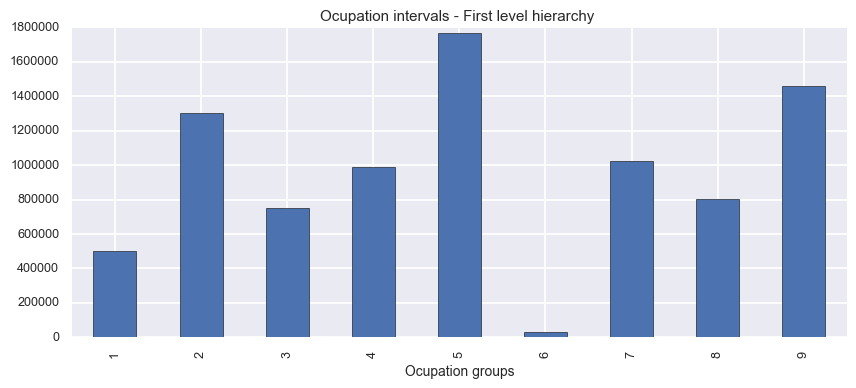

In [256]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(10, 4), dpi=300)
plt.xlabel('Ocupation groups')
plt.title('Ocupation intervals - First level hierarchy ')
plt.ticklabel_format(style='plain', axis='y')

fig1 = dfocc_group.loc[:,"1":"9"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')
# fig1.set_xticklabels(labelsl1)

In [257]:
# slice ocupations columns for Third hierarchy level

dfocc_group['11'] = dfocc_group[['110','111','112']].sum(axis=1)
dfocc_group['12'] = dfocc_group[['121','122']].sum(axis=1)
dfocc_group['13'] = dfocc_group[['131','132','133','134']].sum(axis=1)
dfocc_group['14'] = dfocc_group[['141','142','143']].sum(axis=1)

dfocc_group['21'] = dfocc_group[['210','211','212','213','214','215','216']].sum(axis=1)
dfocc_group['22'] = dfocc_group[['221','222','223','224','225','226']].sum(axis=1)
dfocc_group['23'] = dfocc_group[['231','232','233','234','235']].sum(axis=1)
dfocc_group['24'] = dfocc_group[['241','242','243']].sum(axis=1)
dfocc_group['25'] = dfocc_group[['251','252']].sum(axis=1)
dfocc_group['26'] = dfocc_group[['261','262','263','264','265']].sum(axis=1)
dfocc_group['29'] = dfocc_group[['299']].sum(axis=1)

dfocc_group['31'] = dfocc_group[['311','312','313','314','315']].sum(axis=1)
dfocc_group['32'] = dfocc_group[['321','322','323','324','325']].sum(axis=1)
dfocc_group['33'] = dfocc_group[['331','332','333','334','335']].sum(axis=1)
dfocc_group['34'] = dfocc_group[['341','342','343']].sum(axis=1)
dfocc_group['35'] = dfocc_group[['351','352']].sum(axis=1)

dfocc_group['41'] = dfocc_group[['411','412','413','421']].sum(axis=1)
dfocc_group['42'] = dfocc_group[['422']].sum(axis=1)
dfocc_group['43'] = dfocc_group[['431','432']].sum(axis=1)
dfocc_group['44'] = dfocc_group[['441']].sum(axis=1)

dfocc_group['51'] = dfocc_group[['511','512','513','514','515','516']].sum(axis=1)
dfocc_group['52'] = dfocc_group[['521','522','523','524']].sum(axis=1)
dfocc_group['53'] = dfocc_group[['531','532']].sum(axis=1)
dfocc_group['54'] = dfocc_group[['541']].sum(axis=1)
dfocc_group['59'] = dfocc_group[['599']].sum(axis=1)

dfocc_group['61'] = dfocc_group[['611','612','613']].sum(axis=1)
dfocc_group['62'] = dfocc_group[['621','622']].sum(axis=1)

dfocc_group['71'] = dfocc_group[['711','712','713']].sum(axis=1)
dfocc_group['72'] = dfocc_group[['721','722','723']].sum(axis=1)
dfocc_group['73'] = dfocc_group[['731','732']].sum(axis=1)
dfocc_group['74'] = dfocc_group[['741','742']].sum(axis=1)
dfocc_group['75'] = dfocc_group[['751','752','753','754']].sum(axis=1)

dfocc_group['81'] = dfocc_group[['811','812','813','814','815','816','817','818']].sum(axis=1)
dfocc_group['82'] = dfocc_group[['821']].sum(axis=1)
dfocc_group['83'] = dfocc_group[['831','832','833','834','835']].sum(axis=1)

dfocc_group['91'] = dfocc_group[['911','912']].sum(axis=1)
dfocc_group['92'] = dfocc_group[['921']].sum(axis=1)
dfocc_group['93'] = dfocc_group[['931','932','933']].sum(axis=1)
dfocc_group['94'] = dfocc_group[['941']].sum(axis=1)
dfocc_group['95'] = dfocc_group[['951','952']].sum(axis=1)
dfocc_group['96'] = dfocc_group[['961','962']].sum(axis=1)
dfocc_group['99'] = dfocc_group[['999']].sum(axis=1)

In [258]:
# Labels


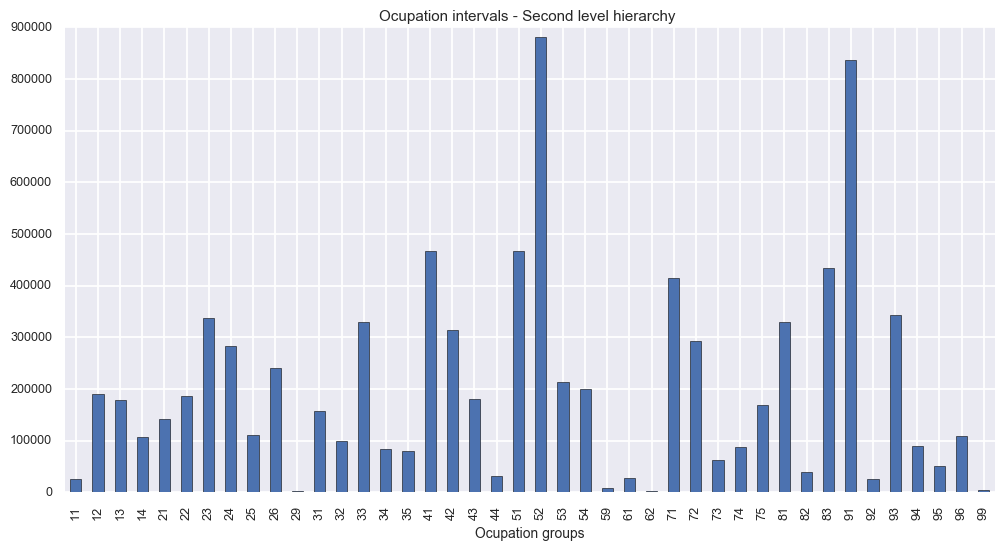

In [259]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(12, 6), dpi=300)
plt.xlabel('Ocupation groups')
plt.title('Ocupation intervals - Second level hierarchy ')
plt.ticklabel_format(style='plain', axis='y')

fig1 = dfocc_group.loc[:,"11":"99"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')
# fig1.set_xticklabels(labelsl1)

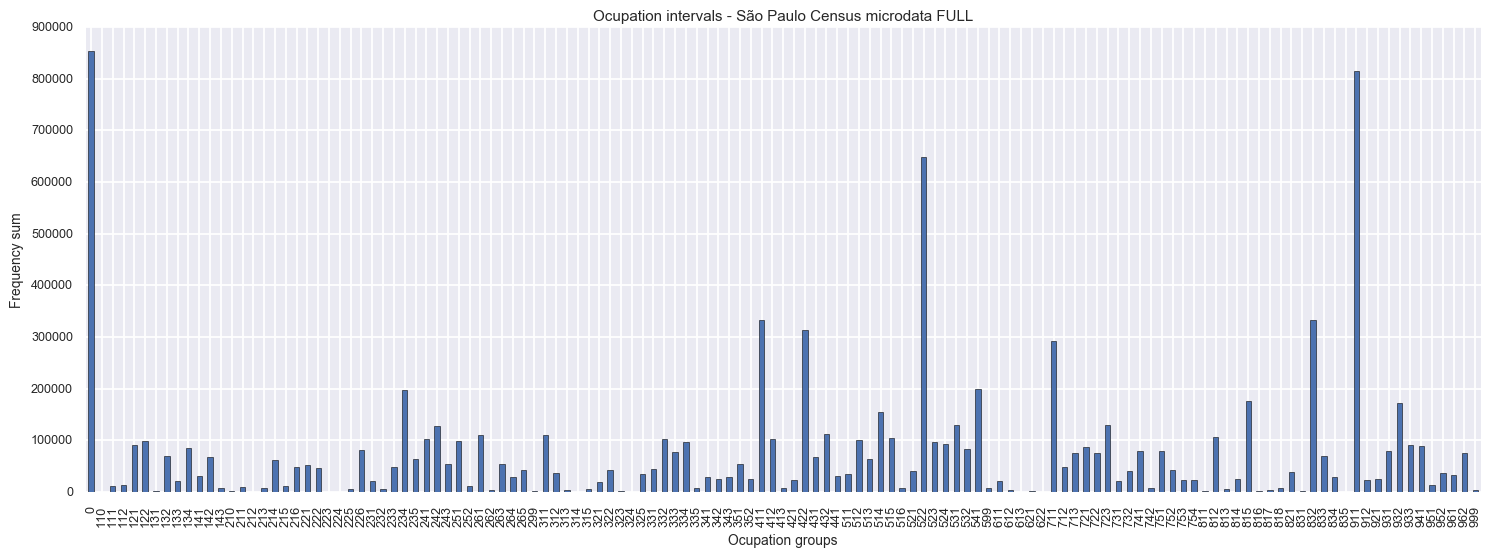

In [260]:
# plot income 
% matplotlib inline

sns.set_style("darkgrid")
sns.set_context("talk", font_scale=0.7, rc={"lines.linewidth": 1.5})
plt.figure(facecolor="white", figsize=(18, 6), dpi=300)
plt.ylabel('Frequency sum')
plt.title('Ocupation intervals - São Paulo Census microdata FULL')
plt.ticklabel_format(style='plain', axis='y')

dfocc_group.loc[:,"0":"999"].sum().plot(kind='bar')
plt.xlabel('Ocupation groups')

## Pearson Correlations

In [261]:
# Slice data frame to get proportion data columns
cor_occup_hier1 = dfocc_group.loc[:,'1':'9'].corr()
cor_occup_hier1

V6461,1,2,3,4,5,6,7,8,9
V6461,,,,,,,,,
1,1.000000,0.928663,0.709763,0.268142,0.062998,-0.095286,-0.289158,-0.197986,-0.252528
2,0.928663,1.000000,0.734938,0.270854,0.069722,-0.105598,-0.307261,-0.214794,-0.282616
3,0.709763,0.734938,1.000000,0.754241,0.528050,-0.158945,0.138803,0.269647,0.076462
4,0.268142,0.270854,0.754241,1.000000,0.786916,-0.127938,0.529361,0.660975,0.446452
5,0.062998,0.069722,0.528050,0.786916,1.000000,-0.023670,0.729268,0.750952,0.733449
6,-0.095286,-0.105598,-0.158945,-0.127938,-0.023670,1.000000,0.095952,0.010381,0.175590
7,-0.289158,-0.307261,0.138803,0.529361,0.729268,0.095952,1.000000,0.848002,0.879046
8,-0.197986,-0.214794,0.269647,0.660975,0.750952,0.010381,0.848002,1.000000,0.748879
9,-0.252528,-0.282616,0.076462,0.446452,0.733449,0.175590,0.879046,0.748879,1.000000


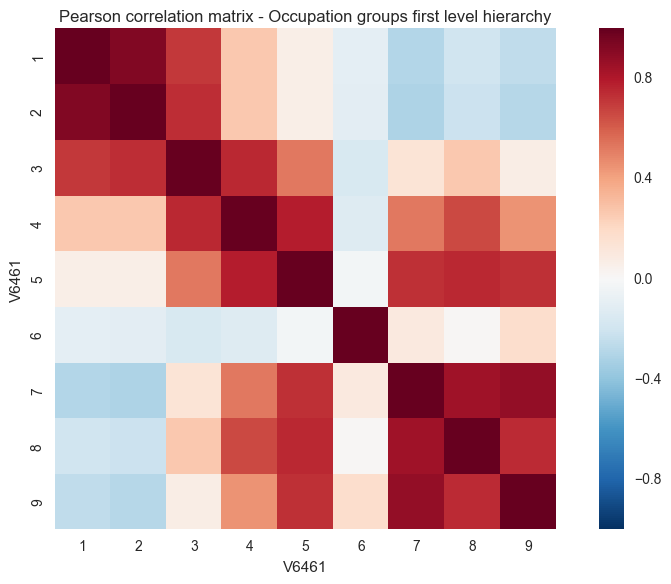

In [262]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
f1, ax1 = plt.subplots(figsize=(9, 6), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups first level hierarchy')
sns.heatmap(cor_occup_hier1, square=True)
f1.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_.png")

In [263]:
# Slice data frame to get proportion data columns
cor_occup_hier2 = dfocc_group.loc[:,'11':'99'].corr()
cor_occup_hier2.head()

V6461,11,12,13,14,21,22,23,24,25,26,...,81,82,83,91,92,93,94,95,96,99
V6461,,,,,,,,,,,,,,,,,,,,,
11,1.000000,0.676888,0.689306,0.485049,0.709010,0.657036,0.452358,0.603044,0.455122,0.759254,...,-0.261328,-0.201099,-0.222287,-0.134719,-0.060237,-0.264499,-0.213040,-0.108939,-0.214782,0.044887
12,0.676888,1.000000,0.875933,0.686108,0.842322,0.785891,0.706971,0.879850,0.761829,0.816510,...,-0.226015,-0.168157,-0.109013,-0.175915,-0.139982,-0.282232,-0.203983,0.013429,-0.187727,0.104426
13,0.689306,0.875933,1.000000,0.737071,0.865985,0.828723,0.707835,0.830280,0.755031,0.866245,...,-0.253375,-0.204974,-0.171848,-0.240063,-0.113541,-0.338493,-0.216275,-0.022775,-0.189298,0.121189
14,0.485049,0.686108,0.737071,1.000000,0.669560,0.662033,0.690013,0.678201,0.582400,0.663235,...,-0.035130,-0.057189,0.035147,-0.128583,-0.045285,-0.133637,-0.035147,0.142235,0.057286,0.160489
21,0.709010,0.842322,0.865985,0.669560,1.000000,0.898161,0.685910,0.853935,0.741660,0.897357,...,-0.304742,-0.244868,-0.266531,-0.265363,-0.108345,-0.368023,-0.252818,-0.037711,-0.252066,0.135461


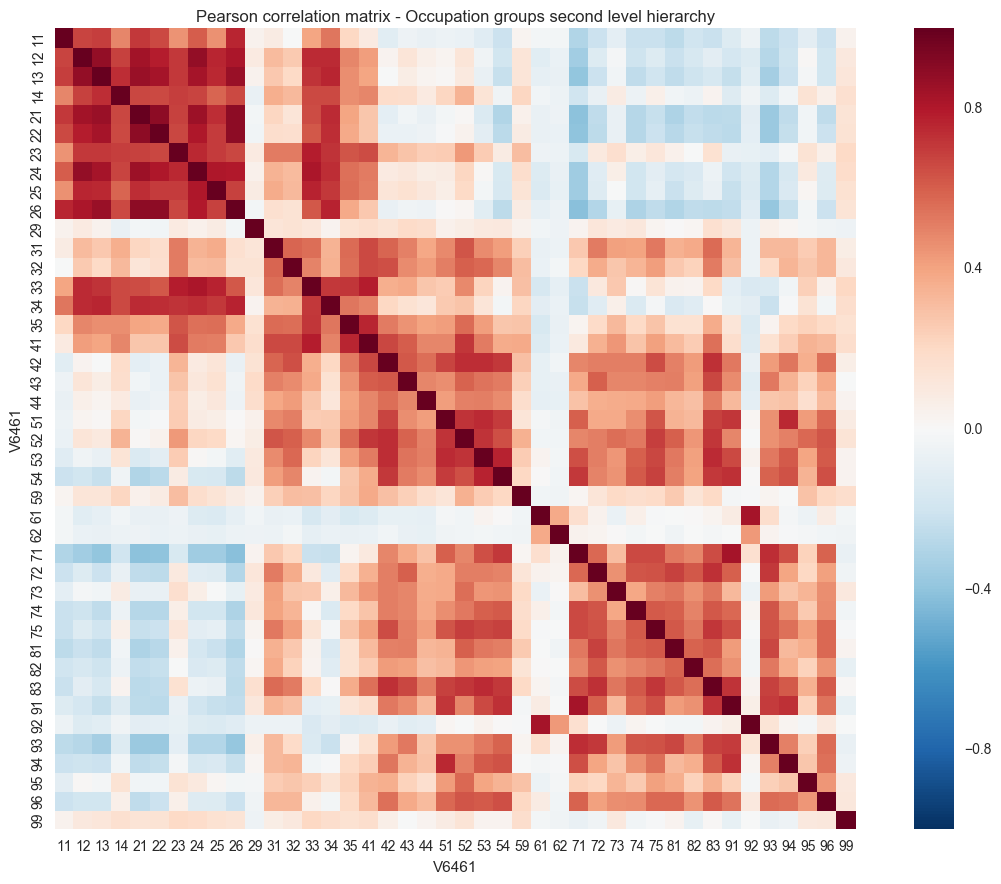

In [264]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(12, 9), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups second level hierarchy')
f2 = sns.heatmap(cor_occup_hier2, square=True)
# f2.set_xticklabels(labelsl2)
# f2.set_yticklabels(reversed(labelsl2))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl2.png")

In [265]:
# Slice data frame to get proportion data columns
cor_occup_hier3 = dfocc_group.loc[:,'110':'999'].corr()
cor_occup_hier3.head()

V6461,110,111,112,121,122,131,132,133,134,141,...,921,931,932,933,941,951,952,961,962,999
V6461,,,,,,,,,,,,,,,,,,,,,
110,1.000000,0.151553,0.109021,0.069932,0.130582,0.021817,0.133633,0.116185,0.119652,0.026742,...,-0.041091,-0.082339,-0.048864,0.040233,-0.071041,-0.037844,0.000113,-0.022293,-0.053794,0.043151
111,0.151553,1.000000,0.435541,0.467469,0.459892,0.175977,0.412085,0.435268,0.535763,0.261144,...,-0.025066,-0.175069,-0.151649,-0.116053,-0.159717,-0.084294,-0.049186,-0.137655,-0.108388,0.117356
112,0.109021,0.435541,1.000000,0.580927,0.645249,0.397439,0.488921,0.531825,0.619758,0.228471,...,-0.064248,-0.186371,-0.238748,-0.190422,-0.194149,-0.127617,-0.082377,-0.182205,-0.173841,-0.005971
121,0.069932,0.467469,0.580927,1.000000,0.852122,0.227652,0.724370,0.721610,0.767812,0.470183,...,-0.125151,-0.249785,-0.208013,-0.092067,-0.182975,-0.028687,0.067666,-0.192256,-0.077425,0.098519
122,0.130582,0.459892,0.645249,0.852122,1.000000,0.277184,0.747991,0.745983,0.814520,0.427946,...,-0.143230,-0.302886,-0.302626,-0.163353,-0.208179,-0.081216,-0.001366,-0.240633,-0.146444,0.102269


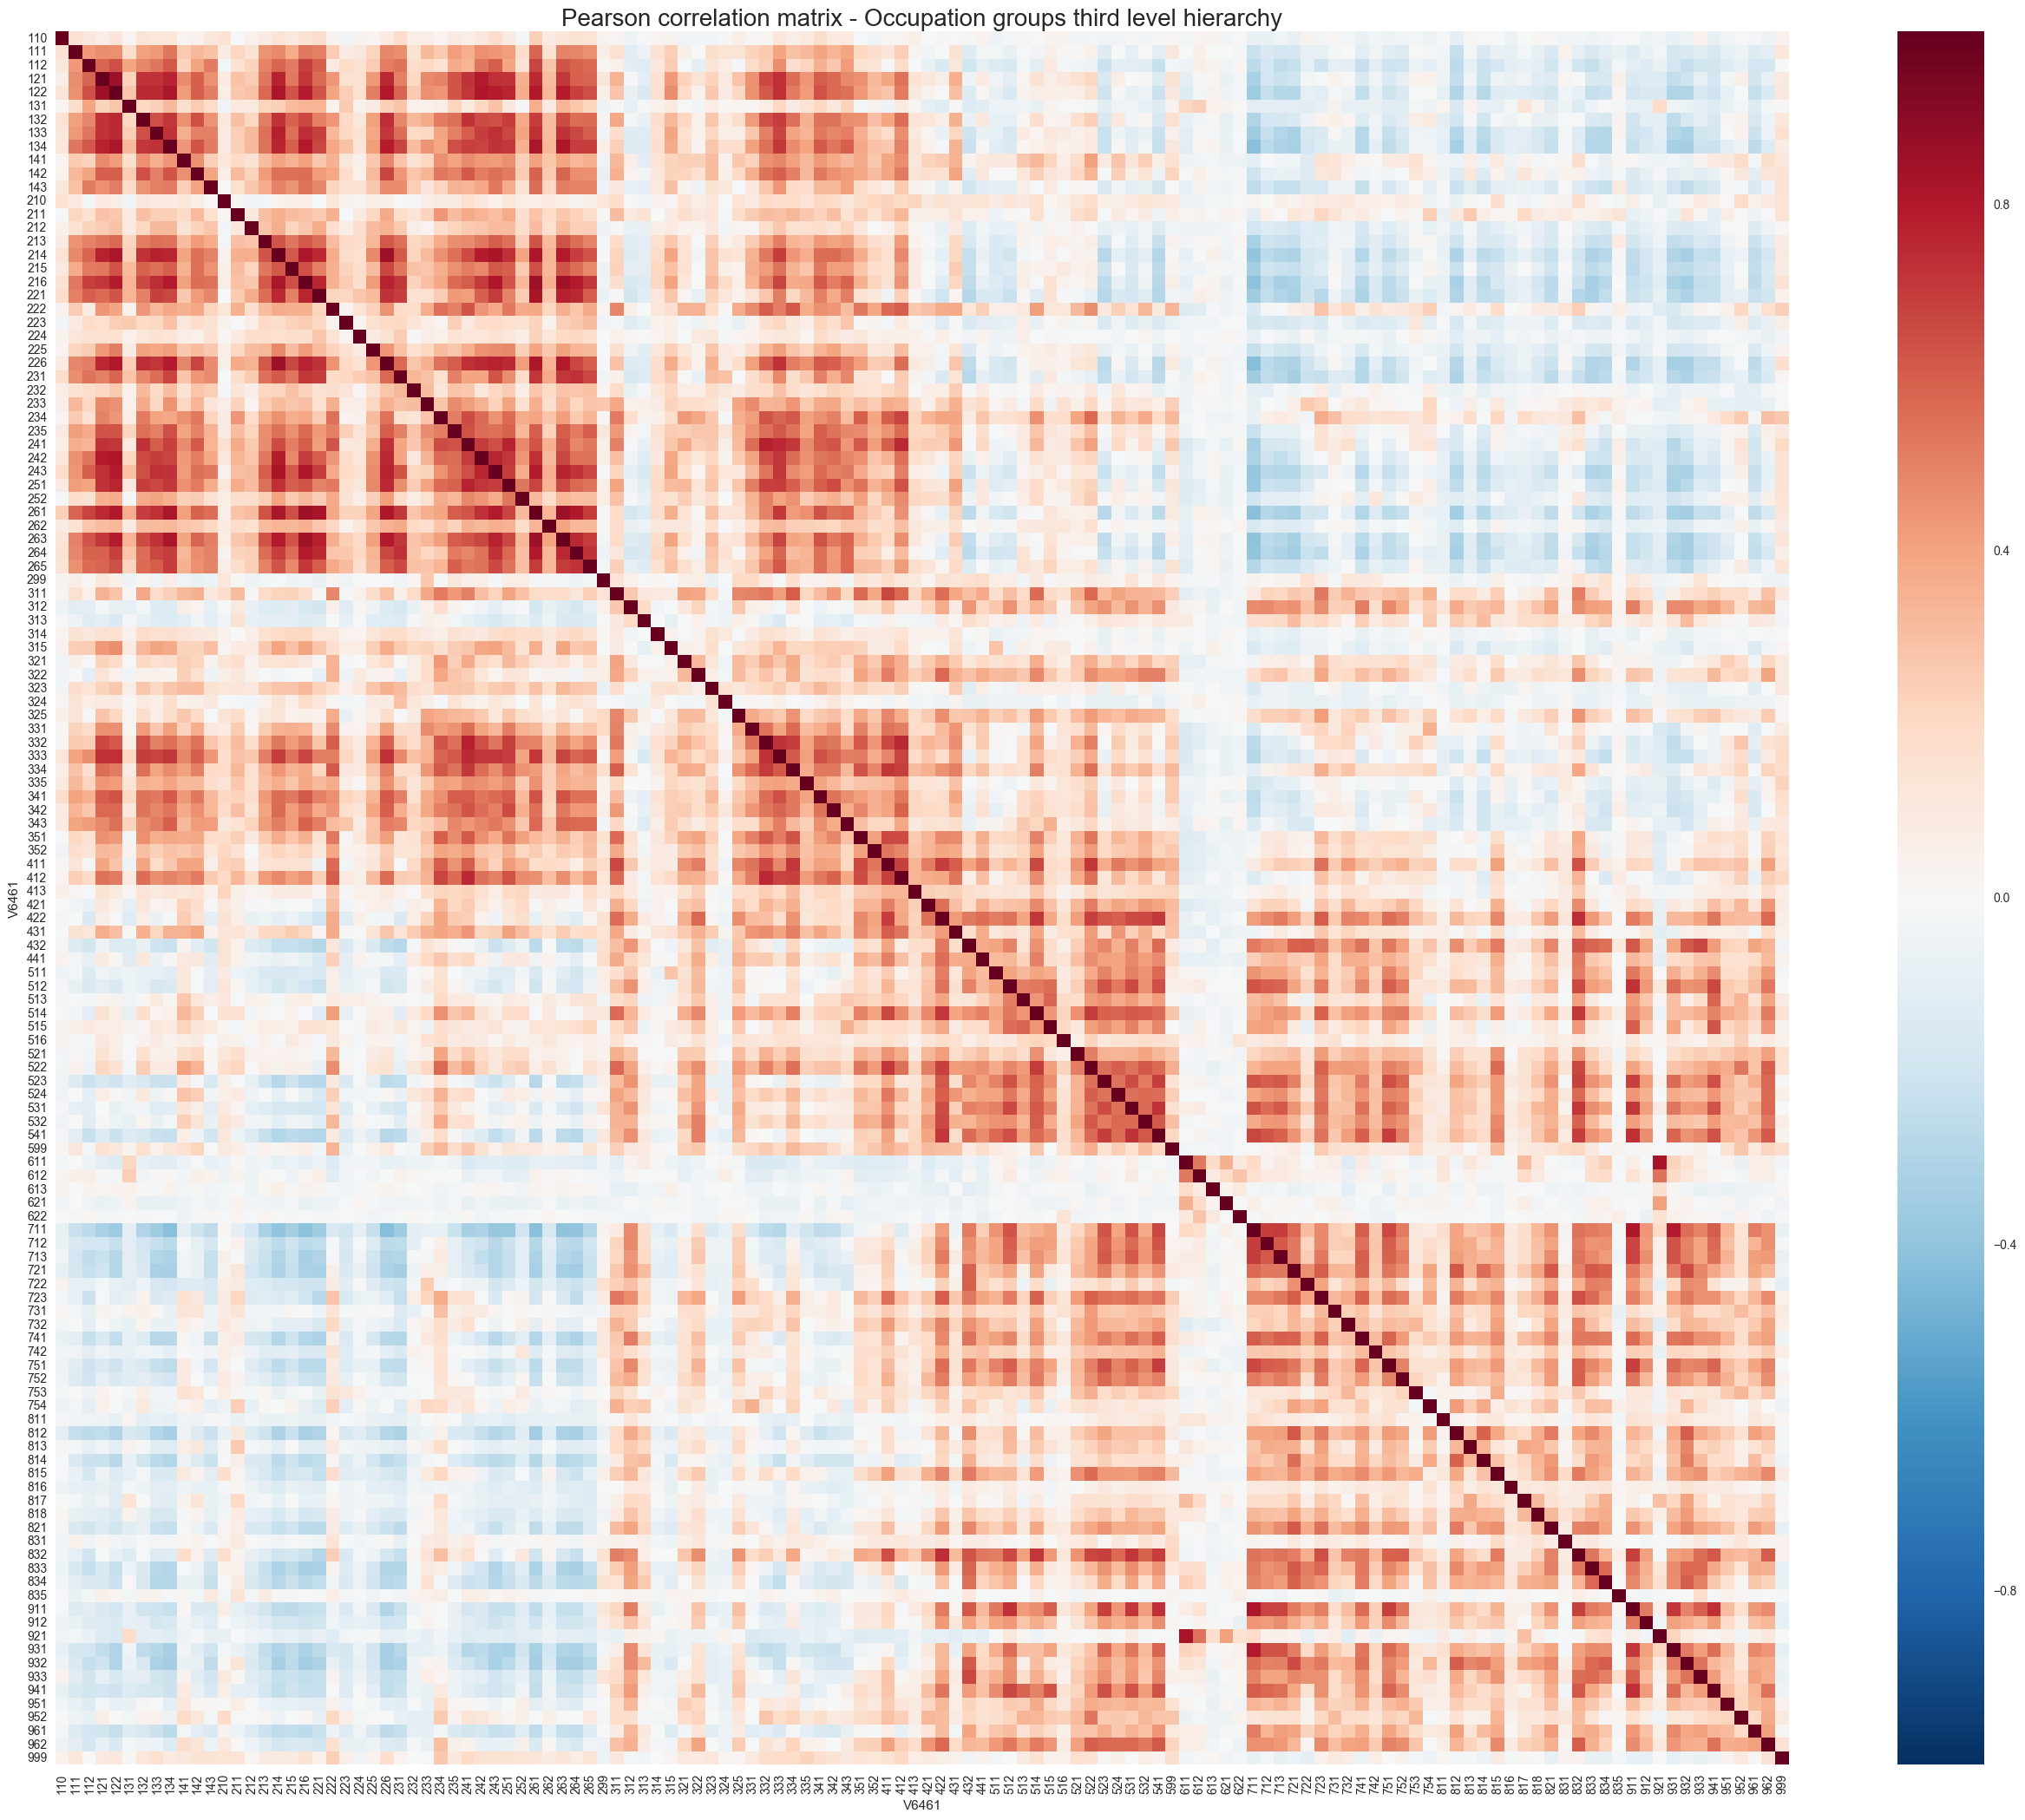

In [266]:
# Plot Heatmap based on hier_level3 data frame 
% matplotlib inline
sns.set(context="notebook")
plt.subplots(figsize=(26, 21), dpi=300)
plt.title('Pearson correlation matrix - Occupation groups third level hierarchy', fontsize=20)
f3 = sns.heatmap(cor_occup_hier3, square=True)
# f3.set_xticklabels(labelsl3)
# f3.set_yticklabels(reversed(labelsl3))
plt.tight_layout()
# plt.savefig("/Users/sandrofsousa/Dropbox/Resolution - SP London/Documents/Histograms/Occupation_pearson_hierl3.png")

## Moran I Correlations

In [289]:
# Save data with new columns to csv
csvoccup = "~/Dropbox/Resolution - SP London/Data/Census/São Paulo/occupation_grouped_rmsp_2010.csv"
dfocc_group.loc[:,'110':'99'].to_csv(csvoccup)  #save to csv

**Based on Queen Contiguity Weight**

Prepares data reading shape file for OA London and computes Contiguity Based Weights using Queen method

In [291]:
shp_path1 = "/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "São Paulo/WeightingAreas_Shapefile/AP2010_CEM_RMSP_EGP_EDU_OCC.shp"
weight_cont_occup = pysal.queen_from_shapefile(shp_path1)

**Histogram showing the distribuition of neighbors in queen weight**

<Container object of 14 artists>

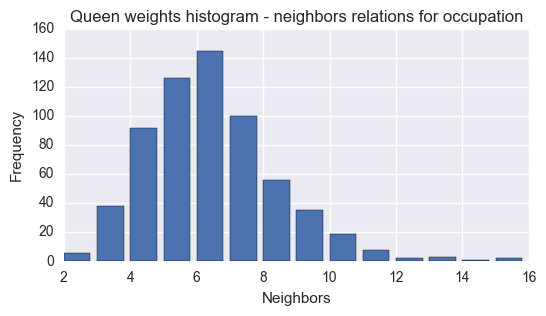

In [292]:
% matplotlib inline
sns.set(context="notebook")
plt.figure(facecolor="white", figsize=(6, 3), dpi=300)
plt.xlabel('Neighbors')
plt.ylabel('Frequency')
plt.title('Queen weights histogram - neighbors relations for occupation')
plt.bar(*zip(*weight_cont_occup.histogram))

**Compute Bivariate Moran for all elements of occupation groups**

Variables are compared pairwised resulting on a matrix 999 random permutations are used for calculation of pseudo p_values

In [295]:
# Call main function to compute Moran and P-values ethnic groups
    
f1 = pysal.open("/Users/sandrofsousa/Dropbox/Resolution - SP London/Data/Shape files/" \
            "São Paulo/WeightingAreas_Shapefile/AP2010_CEM_RMSP_EGP_EDU_OCC_CENT.dbf")

In [ ]:
var_occup = list(cor_occup_prop)
matrices_occup = calc_moran_matrix(var_occup, weight_cont_occup, f2)